In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**shift(0,30,60,90,120,150,180,210,240,270,300,330,360)**

In [ ]:
df = pd.read_csv("US_research2.csv", encoding="utf-8").drop(columns="Unnamed: 0")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#df[['Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']] = df[['Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']].shift(360)
df = df.dropna().reset_index(drop=True)
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-02,Boehner Is Said to Back Change on Immigration ...,1223.48,95.42,24.30,1.06,6.04,0.73,105.32,13.15,51.53
1,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
2,2014-01-04,Access to Abortion Falling as States Pass Rest...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
3,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,1234.33,94.18,24.28,1.07,6.04,0.73,104.83,13.09,51.67
4,2014-01-06,"The Muslim Brotherhood, Back in a Fight to Sur...",1237.73,93.68,24.33,1.06,6.04,0.74,104.91,13.07,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1812.37,79.75,22.76,1.36,6.96,0.94,132.76,19.36,98.69
3282,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1805.94,78.60,22.73,1.35,6.96,0.94,133.49,19.46,97.40
3283,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1815.18,78.60,22.80,1.36,6.98,0.94,134.03,19.42,98.60
3284,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1824.44,80.46,22.72,1.36,6.96,0.94,132.92,19.46,98.21


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']] = scaler.fit_transform(df[['gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']])
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-02,Boehner Is Said to Back Change on Immigration ...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53
1,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
2,2014-01-04,Access to Abortion Falling as States Pass Rest...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
3,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
4,2014-01-06,"The Muslim Brotherhood, Back in a Fight to Sur...",-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69
3282,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40
3283,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60
3284,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3286 non-null   datetime64[ns]
 1   Headline  3286 non-null   object        
 2   gold      3286 non-null   float64       
 3   oil       3286 non-null   float64       
 4   bond      3286 non-null   float64       
 5   cad       3286 non-null   float64       
 6   cny       3286 non-null   float64       
 7   eur       3286 non-null   float64       
 8   jpy       3286 non-null   float64       
 9   mxn       3286 non-null   float64       
 10  ETF       3286 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 282.5+ KB


In [ ]:
df.describe()

,Date,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
count,3286,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3.286000e+03,3286.000000,3286.000000
mean,2018-07-02 11:59:59.999999744,-1.383893e-16,-5.189600e-17,-4.324667e-16,9.687253e-16,-3.355941e-15,5.881547e-16,-7.611413e-16,0.000000,72.713253
min,2014-01-02 00:00:00,-1.462010e+00,-2.385600e+00,-2.889129e+00,-2.907813e+00,-1.893887e+00,-2.565061e+00,-1.413749e+00,-2.286268,48.010000
25%,2016-04-02 06:00:00,-7.734784e-01,-6.992835e-01,-6.260769e-01,-2.695289e-01,-8.026000e-01,-5.572101e-01,-6.058626e-01,-0.330455,56.470000
50%,2018-07-02 12:00:00,-4.824119e-01,-2.397743e-01,-1.908745e-01,2.581279e-01,-4.200587e-02,1.120734e-01,-2.501516e-01,0.212383,71.970000
75%,2020-09-30 18:00:00,1.090654e+00,4.916475e-01,6.011938e-01,6.538705e-01,8.839348e-01,6.140361e-01,2.568325e-01,0.607537,82.847500
max,2022-12-31 00:00:00,2.369020e+00,3.121746e+00,2.455156e+00,2.368755e+00,2.305915e+00,2.789208e+00,4.096757e+00,2.703051,107.120000
std,NaN,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152e+00,1.000152,16.692409


In [ ]:
stopwords_object = stopwords.words('english')

def preprocessing_text(data):
    if type(data) is float:
      data = str(data);

    data = data.lower()
    data = re.sub("[^a-zA-Z]"," ", data)

    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords_object]


    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)

In [ ]:
df["Headline"] = df["Headline"].apply(preprocessing_text)
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-02,boehner said back chang immigr video boehner i...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53
1,2014-01-03,qaeda align milit threaten key iraqi citi emer...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
2,2014-01-04,access abort fall state pas restrict graphic a...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
3,2014-01-05,new york state set loosen marijuana law map st...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67
4,2014-01-06,muslim brotherhood back fight surviv sudan los...,-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,retire one reason fed given big worker rebound...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69
3282,2022-12-28,tragic battl front line china covid crisi sout...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40
3283,2022-12-29,u scrambl stop iran provid drone russia hard l...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60
3284,2022-12-30,russian missil barrag stagger ukrain air defen...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21


## **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
tfidf_result = tfidf.fit_transform(df["Headline"])
df["tfidf_Headline"] = list(tfidf_result.toarray())

In [ ]:
df["tfidf_Headline"] = np.array(df['tfidf_Headline'].tolist())
X = df[['tfidf_Headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']]
y = df["ETF"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
print(f"Random Forest MAPE: {rf_mape}")

r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest R제곱: {r2}')

Random Forest RMSE: 1.1651936632475954
Random Forest MAE: 0.5254472644376907
Random Forest MAPE: 0.007383957827846848
Random Forest R제곱: 0.995081394882931


In [ ]:
feature_importances = rf.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

tfidf_Headline: 1.7475380122920732e-07
gold: 0.5902141573719675
oil: 0.20184332142760963
bond: 0.024200184810871737
cad: 0.029126214315603655
cny: 0.03023448780578855
eur: 0.007045493278447151
jpy: 0.008568219442632807
mxn: 0.10876774679327776


In [ ]:
#plt.figure(figsize=(30,6))

#plt.plot(np.arange(453), y_test, label='Actual', linestyle='-')
#plt.plot(np.arange(453), rf_predictions, label='Predicted', linestyle='-')

# 그래프 제목과 축 레이블 설정
#plt.title('Shift(30)')
#plt.xlabel('Data Points')
#plt.ylabel('Prices')

# 범례 추가
#plt.legend()

# 그래프 표시
#plt.show()

### **LSTM**

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import PReLU

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
#lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(256))
lstm_model.add(PReLU())
#lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dense(64))
lstm_model.add(PReLU())
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

KeyboardInterrupt: 

In [ ]:
lstm_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 784)               2464896   
                                                                 
 dense_39 (Dense)            (None, 256)               200960    
                                                                 
 p_re_lu_26 (PReLU)          (None, 256)               256       
                                                                 
 dense_40 (Dense)            (None, 64)                16448     
                                                                 
 p_re_lu_27 (PReLU)          (None, 64)                64        
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2682689 (10.23 MB)
Trainable params: 26

In [ ]:
history = lstm_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

# 테스트 데이터에 대한 예측
lstm_predictions = lstm_model.predict(X_lstm_test)

# 평가
lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

# R제곱 계산
r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
74/74 [==============================] - 3s 12ms/step - loss: 991.3888 - mape: 30.6803 - val_loss: 289.0718 - val_mape: 19.6572
Epoch 2/300
74/74 [==============================] - 0s 5ms/step - loss: 256.4806 - mape: 18.2243 - val_loss: 287.1268 - val_mape: 19.1302
Epoch 3/300
74/74 [==============================] - 0s 5ms/step - loss: 254.3990 - mape: 18.0986 - val_loss: 281.7778 - val_mape: 21.3597
Epoch 4/300
74/74 [==============================] - 0s 5ms/step - loss: 204.7400 - mape: 16.4052 - val_loss: 202.1918 - val_mape: 14.6361
Epoch 5/300
74/74 [==============================] - 0s 5ms/step - loss: 93.4910 - mape: 10.6396 - val_loss: 46.8824 - val_mape: 7.5572
Epoch 6/300
74/74 [==============================] - 0s 5ms/step - loss: 43.9437 - mape: 7.3455 - val_loss: 52.6112 - val_mape: 7.3818
Epoch 7/300
74/74 [==============================] - 0s 5ms/step - loss: 34.0176 - mape: 6.2809 - val_loss: 31.6410 - val_mape: 5.5401
Epoch 8/300
74/74 [==================

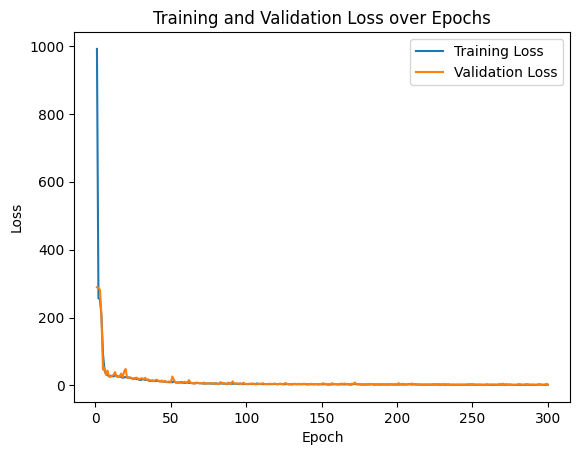

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values over epochs
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **BERT**

In [ ]:
!pip install pandas transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

df['headline']=df["Headline"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
tokenized_headlines = df['headline'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

max_len = max(map(len, tokenized_headlines))
padded_headlines = torch.tensor([i + [0]*(max_len-len(i)) for i in tokenized_headlines])

In [ ]:
attention_mask = (padded_headlines != 0).float()

In [ ]:
with torch.no_grad():
    outputs = model(padded_headlines, attention_mask=attention_mask)

In [ ]:
bert_embeddings = outputs.last_hidden_state[:, 0, :]

In [ ]:
bert_embeddings.shape

torch.Size([3286, 768])

In [ ]:
bert_headline = bert_embeddings.tolist()
df['bert_headline'] = bert_headline
df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF,tfidf_Headline,headline,bert_headline
0,2014-01-02,boehner said back chang immigr video boehner i...,-0.820342,1.602611,-1.026463,-2.907813,-1.860818,-2.397740,-0.820714,-2.162533,51.53,0.0,boehner said back chang immigr video boehner i...,"[-0.32114651799201965, -0.002750196261331439, ..."
1,2014-01-03,qaeda align milit threaten key iraqi citi emer...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,0.0,qaeda align milit threaten key iraqi citi emer...,"[-0.3646487891674042, -0.020438827574253082, 0..."
2,2014-01-04,access abort fall state pas restrict graphic a...,-0.769958,1.544629,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,0.0,access abort fall state pas restrict graphic a...,"[-0.23173445463180542, -0.0754479393362999, 0...."
3,2014-01-05,new york state set loosen marijuana law map st...,-0.779485,1.542696,-1.043871,-2.775899,-1.860818,-2.397740,-0.874427,-2.186482,51.67,0.0,new york state set loosen marijuana law map st...,"[-0.28871265053749084, -0.08052438497543335, 0..."
4,2014-01-06,muslim brotherhood back fight surviv sudan los...,-0.766681,1.518537,-1.000351,-2.907813,-1.860818,-2.230419,-0.865658,-2.194465,51.37,0.0,muslim brotherhood back fight surviv sudan los...,"[-0.3476771414279938, -0.09978587180376053, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,2022-12-27,retire one reason fed given big worker rebound...,1.397216,0.845460,-2.366886,1.049613,1.181559,1.115999,2.187209,0.316161,98.69,0.0,retire one reason fed given big worker rebound...,"[-0.23019716143608093, 0.015007533133029938, 0..."
3282,2022-12-28,tragic battl front line china covid crisi sout...,1.373003,0.789894,-2.392998,0.917699,1.181559,1.115999,2.267230,0.356075,97.40,0.0,tragic battl front line china covid crisi sout...,"[-0.16415904462337494, -0.035388678312301636, ..."
3283,2022-12-29,u scrambl stop iran provid drone russia hard l...,1.407798,0.789894,-2.332070,1.049613,1.247697,1.115999,2.326424,0.340109,98.60,0.0,u scrambl stop iran provid drone russia hard l...,"[-0.1855580359697342, 0.07810107618570328, 0.3..."
3284,2022-12-30,russian missil barrag stagger ukrain air defen...,1.442668,0.879766,-2.401702,1.049613,1.181559,1.115999,2.204748,0.356075,98.21,0.0,russian missil barrag stagger ukrain air defen...,"[-0.1742321401834488, -0.06985783576965332, 0...."


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 데이터 전처리
df["bert_headline"] = np.array(df['bert_headline'].tolist())
X = df[['bert_headline', 'gold', 'oil', 'bond', 'cad', 'cny', 'eur', 'jpy', 'mxn']]
y = df["ETF"].values

# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Random Forest Regressor 모델 생성 및 훈련
rf2 = RandomForestRegressor(n_estimators=100, random_state=20)
rf2.fit(X_train, y_train)

rf2_predictions = rf2.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf2_predictions, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

rf_mae = mean_absolute_error(y_test, rf2_predictions)
print(f"Random Forest MAE: {rf_mae}")

rf_mape = mean_absolute_percentage_error(y_test, rf2_predictions)
print(f"Random Forest MAPE: {rf_mape}")

r2 = r2_score(y_test, rf2_predictions)
print(f'Random Forest R제곱: {r2}')

Random Forest RMSE: 1.054542866641079
Random Forest MAE: 0.5870806990881412
Random Forest MAPE: 0.008194766418150552
Random Forest R제곱: 0.9959739392469108


In [ ]:
feature_importances = rf2.feature_importances_

# Displaying feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

bert_headline: 0.00030595038846031425
gold: 0.5880194323243589
oil: 0.20857036066313617
bond: 0.013060480002818441
cad: 0.035635580405486415
cny: 0.03879052459588028
eur: 0.005080140022776183
jpy: 0.00857801059774412
mxn: 0.10195952099933905


## **LSTM**

In [ ]:
from keras.layers import PReLU

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_lstm_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
y_lstm_train = np.reshape(y_train, (y_train.shape[0], 1))

X_lstm_val = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
y_lstm_val = np.reshape(y_val, (y_val.shape[0], 1))

X_lstm_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))
y_lstm_test = np.reshape(y_test, (y_test.shape[0], 1))

lstm2_model = Sequential()
lstm2_model.add(LSTM(784, input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
lstm2_model.add(Dense(256))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(64))
lstm2_model.add(PReLU())
lstm2_model.add(Dense(1, activation='linear'))
lstm2_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mape'])

In [ ]:
lstm2_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 784)               2464896   
                                                                 
 dense_42 (Dense)            (None, 256)               200960    
                                                                 
 p_re_lu_28 (PReLU)          (None, 256)               256       
                                                                 
 dense_43 (Dense)            (None, 64)                16448     
                                                                 
 p_re_lu_29 (PReLU)          (None, 64)                64        
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2682689 (10.23 MB)
Trainable params: 26

In [ ]:
history = lstm2_model.fit(X_lstm_train, y_lstm_train, epochs=300, batch_size=32,
                         validation_data=(X_lstm_val, y_lstm_val),verbose=1)

lstm_predictions = lstm2_model.predict(X_lstm_test)

lstm_rmse = mean_squared_error(y_lstm_test, lstm_predictions, squared=False)
print(f"LSTM RMSE: {lstm_rmse}")

lstm_mae = mean_absolute_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAE: {lstm_mae}")

lstm_mape = mean_absolute_percentage_error(y_lstm_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape}")

r2 = r2_score(y_lstm_test, lstm_predictions)
print(f'LSTM R제곱: {r2}')

Epoch 1/300
74/74 [==============================] - 3s 12ms/step - loss: 956.9706 - mape: 28.3130 - val_loss: 124.2521 - val_mape: 13.0649
Epoch 2/300
74/74 [==============================] - 0s 5ms/step - loss: 126.7160 - mape: 12.9846 - val_loss: 101.5243 - val_mape: 12.3827
Epoch 3/300
74/74 [==============================] - 0s 5ms/step - loss: 121.3378 - mape: 12.1388 - val_loss: 180.7176 - val_mape: 14.4826
Epoch 4/300
74/74 [==============================] - 0s 5ms/step - loss: 93.1068 - mape: 10.2104 - val_loss: 94.6165 - val_mape: 9.1135
Epoch 5/300
74/74 [==============================] - 0s 5ms/step - loss: 193.2510 - mape: 14.8466 - val_loss: 84.9391 - val_mape: 11.5479
Epoch 6/300
74/74 [==============================] - 0s 5ms/step - loss: 57.4289 - mape: 8.6577 - val_loss: 76.8709 - val_mape: 9.7339
Epoch 7/300
74/74 [==============================] - 0s 5ms/step - loss: 50.7679 - mape: 7.9736 - val_loss: 38.6732 - val_mape: 7.0925
Epoch 8/300
74/74 [===================

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values over epochs
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#plt.figure(figsize=(30,6))

#plt.plot(np.arange(227), y_lstm_test, label='Actual', linestyle='-')
#plt.plot(np.arange(227), lstm_predictions, label='Predicted', linestyle='-')

#plt.title('Shift(30)')
#plt.xlabel('Data Points')
#plt.ylabel('Prices')

#plt.legend()

#plt.show()